# IMPORTING LIBRARIES

Using tensorflow, numpy, matplotlib and openCV libraries for this module.

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

# LOADING THE MODEL

Using the MoveNet singlepose lightning model for this problem, a convolutional neural network model that runs on RGB images and predicts human joint locations of a single person.

In [2]:
interpreter = tf.lite.Interpreter(model_path="C:\\Users\\Arpit Kumar Lariya\\Downloads\\lite-model_movenet_singlepose_lightning_3.tflite")
interpreter.allocate_tensors()

In [5]:
image = frame.copy()

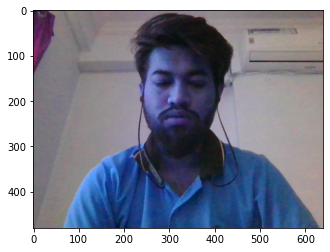

In [6]:
plt.imshow(image)

# MAKING POSE DETECTIONS

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# MARKING THE KEYPOINTS

Marking the keypoints by red color

In [17]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0, 0, 255), -1)

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    # Rendering 
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# DRAWING THE CONNECTIONS/JOINTS

Connecting the various keypoints as mentioned below (nose to left shoulder, nose to right shoulder, left shoulder to left elbow, right shoulder to right elbow, left knee to left ankle, right knee to right ankle).

In [20]:
EDGES = {
    (0, 5): 'm',
    (0, 6): 'c',
#     (1, 3): 'm',
#     (2, 4): 'c',
#     (0, 5): 'm',
#     (0, 6): 'c',
    (5, 7): 'm',
#     (7, 9): 'm',
    (6, 8): 'c',
#     (8, 10): 'c',
#     (5, 6): 'y',
#     (5, 11): 'm',
#     (6, 12): 'c',
#     (11, 12): 'y',
#     (11, 13): 'm',
    (13, 15): 'm',
#     (12, 14): 'c',
    (14, 16): 'c'
}

Marking the edges by green color

In [21]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,128,0), 2)

Finally capturing the webcam video frame by frame and estimating the pose in realtime

In [24]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()